In [1]:
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import classification_report

## Read df and preprocess

In [2]:
df = pd.read_csv(os.getcwd() + '/../data/song_lyrics_cut2.csv')
df.head()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Rock and a Hard Place,rap,Ludacris,2000,893,{},[Intro]\nHell yeah\nIt's an everyday struggle\...,4343,en,en,en
1,The Resistance Freestyle,rap,Brett Michael,2012,28,{},"Gone, jumping off of the deep end, your man lo...",64914,en,en,en
2,Turn Me Up Sfaction version,pop,Benassi Bros.,2004,65,"{""Sandra Chambers""}","Play the music, play the music\nPlay the music...",843817,en,en,en
3,Lay Down,rap,Streetlife,2005,178,"{""Killa Sin""}",[Verse 1: Streetlife]\nSniff on this good shit...,43873,en,en,en
4,Green Light,country,James Dupr,2016,317,"{""James Dupré""}",[Verse 1]\nThere's a little old town in Louisi...,2733038,en,en,en


In [3]:
df.shape

(18000, 11)

In [4]:
df = df.rename(columns={'genre': 'tag', 'lyrics': 'text'})

In [5]:
df = df[['text', 'tag']]
df.columns = ['lyrics', 'genre']
df.head()

,lyrics,genre
0,[Intro]\nHell yeah\nIt's an everyday struggle\...,rap
1,"Gone, jumping off of the deep end, your man lo...",rap
2,"Play the music, play the music\nPlay the music...",pop
3,[Verse 1: Streetlife]\nSniff on this good shit...,rap
4,[Verse 1]\nThere's a little old town in Louisi...,country


In [6]:
# from sklearn.model_selection import train_test_split
# 
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
# Remove stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = word_tokenize(text)
    text = [stemmer.stem(word) for word in text if word not in stop_words and word not in string.punctuation and len(word)]
    return ' '.join(text)

df.lyrics = df.lyrics.apply(preprocess_text)
# 
# train_df['lyrics'] = train_df['lyrics'].apply(preprocess_text)
# test_df['lyrics'] = test_df['lyrics'].apply(preprocess_text)

In [8]:
# Apply tf idf on feature (lyrics)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=0.0001, max_features=5000)
tfidf = tfidf.fit(df['lyrics'])
df['vec'] = df.lyrics.apply(lambda x: tfidf.transform([x]).toarray().ravel())

# X_train = tfidf.fit_transform(train_df['lyrics'])
# X_test = tfidf.transform(test_df['lyrics'])
# X_train.shape

In [9]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['tag'] = encoder.fit_transform(df[['genre']]).ravel()
df.head()

,lyrics,genre,vec,tag
0,intro hell yeah 's everyday struggl tri get tr...,rap,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.0
1,gone jump deep end man look weak ’ wait weeken...,rap,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.0
2,play music play music play music play music pl...,pop,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.0
3,vers 1 streetlif sniff good shit got eye swoll...,rap,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.0
4,vers 1 's littl old town louisiana 'm lucki ca...,country,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0


In [10]:
# apply LDA to reduce dimensionality
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pca = LinearDiscriminantAnalysis(n_components=2)
pca = pca.fit(df.vec.to_list(), df.tag.to_list())

In [11]:
df['pca'] = df.vec.apply(lambda x: pca.transform([x]).ravel())
df['pca_x'] = df.pca.apply(lambda x: x[0])
df['pca_y'] = df.pca.apply(lambda x: x[1])

In [12]:
# custom palette
custom_colors = ["#fe6053", "#b3637c", "#35D4A4", "#333030", "#f9a03f"]
custom_palette = sns.color_palette(custom_colors)
sns.set(font_scale=1.4)
sns.set_palette(custom_palette)

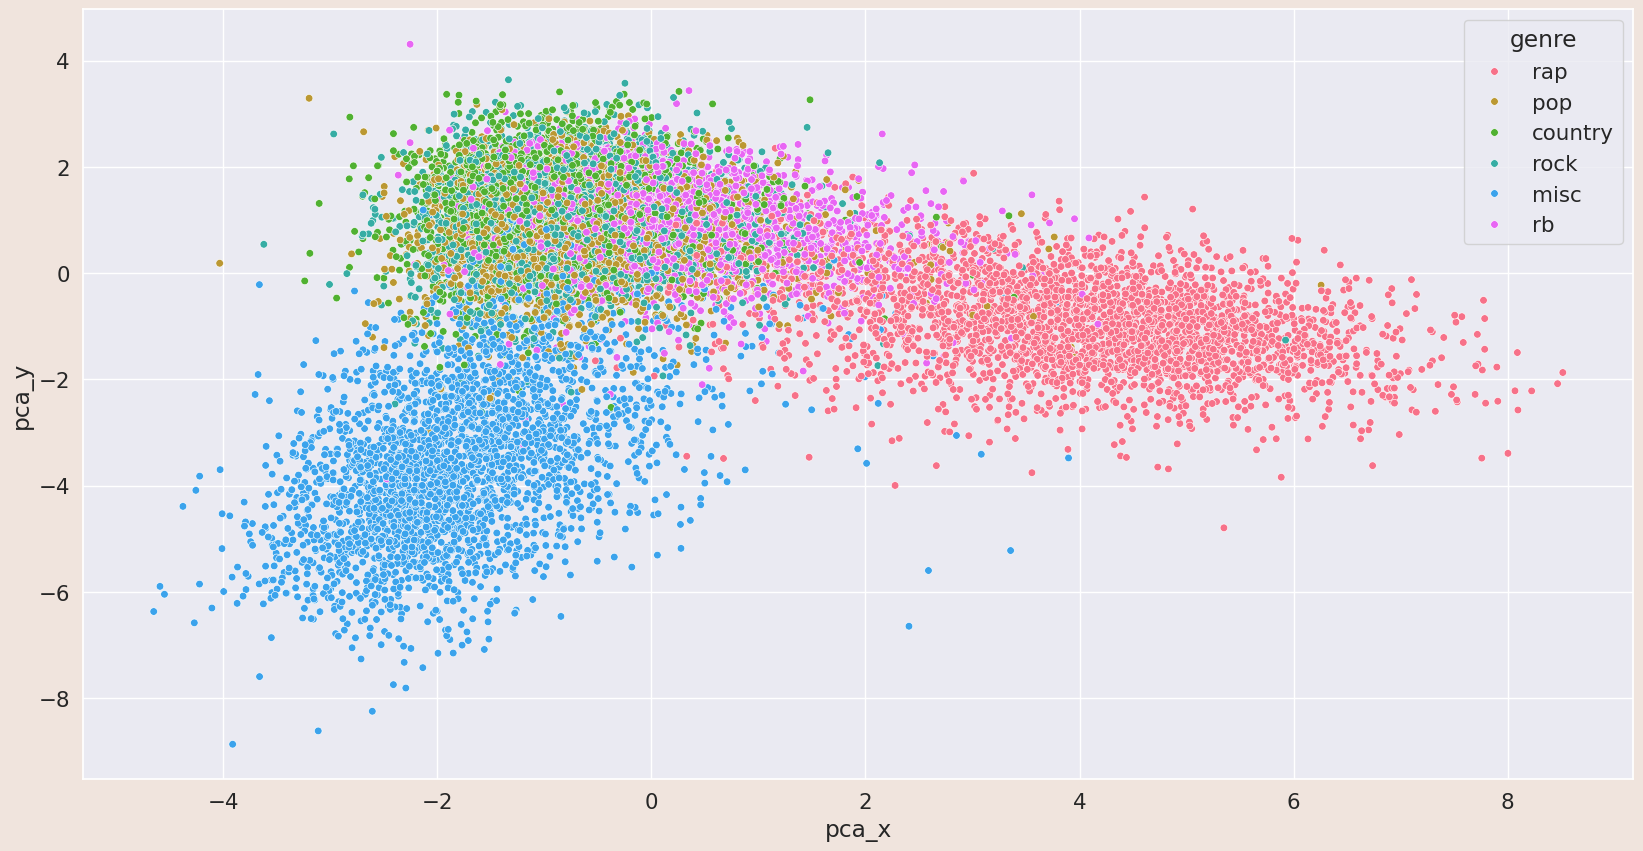

In [14]:
# Plot the data
plt.figure(figsize=(20, 10))
# set background color
plt.gcf().set_facecolor('#f0e4dd')


sns.scatterplot(x='pca_x', y='pca_y', hue='genre', data=df, s=30)
plt.savefig('1st_dataset_pca.png')

# ------------------

In [15]:
df = pd.read_csv(os.getcwd() + '/../data/perfect_dataset.csv')
df.head()

,old_tag,title_x,artist_x,text,views,processed_artist,processed_title,tag,artist_y,title_y,processed title,artist_title
0,rock,Bring Me to Life,Evanescence,[Verse 1: Amy Lee]\nHow can you see into my ey...,658884,evanescence,bringmetolife,metal,Evanescence,Bring Me To Life,bringmetolife,evanescencebringmetolife
1,rock,My Immortal,Evanescence,[Verse 1]\nI'm so tired of being here\nSuppres...,392209,evanescence,myimmortal,metal,Evanescence,My Immortal,myimmortal,evanescencemyimmortal
2,rock,Zombie,Bad Wolves,[Verse 1]\nAnother head hangs lowly\nChild is ...,342157,badwolves,zombie,metal,Bad Wolves,Zombie,zombie,badwolveszombie
3,rock,A Little Piece of Heaven,Avenged Sevenfold,[Verse 1: M. Shadows]\nBefore the story begins...,259796,avengedsevenfold,alittlepieceofheaven,metal,Avenged Sevenfold,A Little Piece of Heaven,alittlepieceofheaven,avengedsevenfoldalittlepieceofheaven
4,rock,Doomsday,Architects,[Verse 1]\nRemember when Hell had frozen over?...,217795,architects,doomsday,metal,Architects,Doomsday,doomsday,architectsdoomsday


In [16]:
df.shape

(175000, 12)

In [17]:
df = df.sample(n=18000, random_state=42)
df.shape

(18000, 12)

In [18]:
df = df[['tag', 'text']]
df.head()

,tag,text
148789,rock,[Instrumental intro 0:00-1:03]\n\n[Chorus]\nWi...
169618,rock,"Brother, Brother\nHelp me please\nI'm as lonel..."
131258,rb,"[Intro: Howard Hewett, Monty Seward]\nYou know..."
31864,metal,Gazing at the stars\nWe're flying over million...
11032,metal,"Timeless we are, timeless we are\nChildren run..."


In [19]:
df = df.rename(columns={'tag': 'genre', 'text': 'lyrics'})

In [20]:
# Remove stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = word_tokenize(text)
    text = [stemmer.stem(word) for word in text if word not in stop_words and word not in string.punctuation and len(word)]
    return ' '.join(text)

df.lyrics = df.lyrics.apply(preprocess_text)


In [27]:
# Apply tf idf on feature (lyrics)
from sklearn.feature_extraction.text import CountVectorizer
tfidf = CountVectorizer(stop_words='english', max_df=0.5, max_features=5000)
tfidf = tfidf.fit(df['lyrics'])
df['vec'] = df.lyrics.apply(lambda x: tfidf.transform([x]).toarray().ravel())

# X_train = tfidf.fit_transform(train_df['lyrics'])
# X_test = tfidf.transform(test_df['lyrics'])
# X_train.shape

In [28]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['tag'] = encoder.fit_transform(df[['genre']]).ravel()
df.head()

,genre,lyrics,vec,tag,pca,pca_x,pca_y
148789,rock,instrument intro 0:00-1:03 choru friend come a...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",4.0,"[0.3593217573998618, -2.6619626441629296]",0.359322,-2.661963
169618,rock,brother brother help pleas 'm lone friend scar...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"[-1.61585532036296, -0.5921487551348449]",-1.615855,-0.592149
131258,rb,intro howard hewett monti seward know mont man...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"[-0.2764491972784289, -2.374669323591467]",-0.276449,-2.374669
31864,metal,gaze star 're fli million restless soul dream ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,"[-1.5280444828890185, -0.8494828407368896]",-1.528044,-0.849483
11032,metal,timeless timeless children run lost found trut...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,"[-1.326060248932286, 0.35144921915352934]",-1.326060,0.351449


In [29]:
# apply LDA to reduce dimensionality
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pca = LinearDiscriminantAnalysis(n_components=2)
pca = pca.fit(df.vec.to_list(), df.tag.to_list())

In [30]:
df['pca'] = df.vec.apply(lambda x: pca.transform([x]).ravel())
df['pca_x'] = df.pca.apply(lambda x: x[0])
df['pca_y'] = df.pca.apply(lambda x: x[1])



In [31]:
# custom palette
custom_colors = ["#fe6053", "#b3637c", "#35D4A4", "#333030", "#f9a03f"]
custom_palette = sns.color_palette(custom_colors)
sns.set(font_scale=1.4)
sns.set_palette(custom_palette)

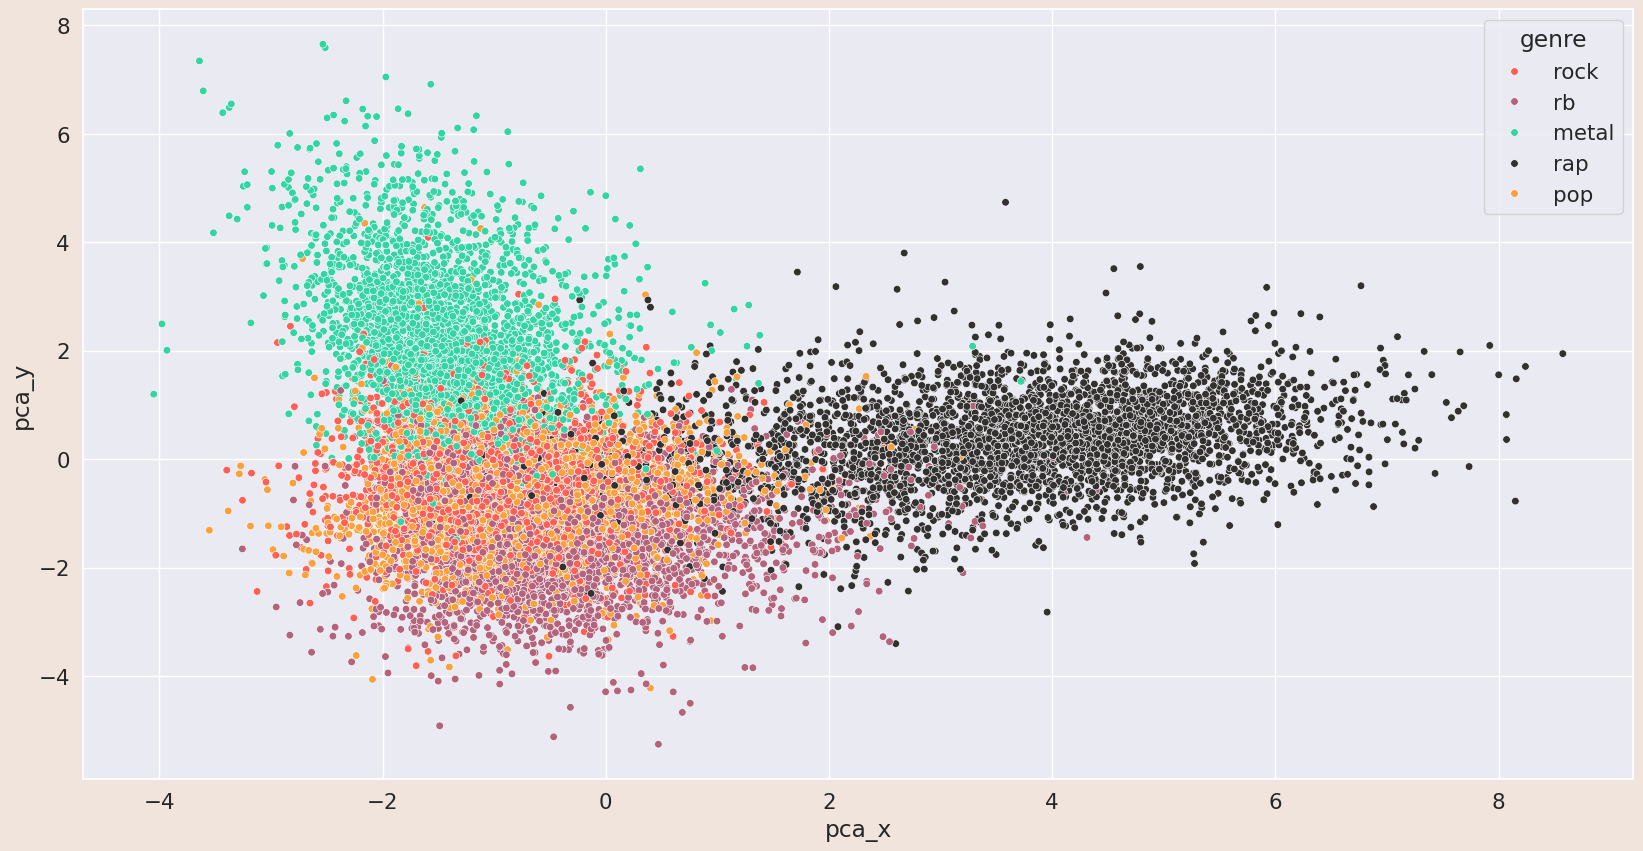

In [32]:
# Plot the data
plt.figure(figsize=(20, 10))
# set background color
plt.gcf().set_facecolor('#f0e4dd')


sns.scatterplot(x='pca_x', y='pca_y', hue='genre', data=df, s=30)
plt.savefig('new_dataset_pca.png')

In [27]:
# # Apply bag of words
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(stop_words='english', max_df=0.7, min_df=0.0001)
# X_train = cv.fit_transform(train_df['lyrics'])
# X_test = cv.transform(test_df['lyrics'])
# X_train.shape

In [17]:
# n-grams bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1, 3), max_df=0.5, min_df=0.0001)
X_train = cv.fit_transform(train_df['lyrics'])
X_test = cv.transform(test_df['lyrics'])
X_train.shape

(28000, 294874)

In [18]:
# Encode target
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
y_train = encoder.fit_transform(train_df[['genre']]).ravel()
y_test = encoder.transform(test_df[['genre']]).ravel()
y_train.shape

(28000,)

## Classical ML models

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

model = SGDClassifier(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'))

0.5964285714285714 0.5947728424566038 0.5964285714285714


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score

model = LogisticRegression(max_iter=1500, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'))


0.6207142857142857 0.6188649122782673 0.6207142857142857


In [21]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# 
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('LogReg Confusion Matrix')
# plt.savefig('log_reg_cm.png')

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'))


0.398 0.3785506106861004 0.398


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'))


0.6128571428571429 0.605932530968903 0.6128571428571429


In [24]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'))

0.6147142857142858 0.6122517415826021 0.6147142857142858
